# Shifting peaks: Data analysis

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import logging

from constants import PATH_PURE_COMPONENTS, PATH_MIXTURES, X
from file_io import load_pickle_file
from fit_with_x_axis_correction.combination_analysis import solve_with_grid_search_gauss_newton
from fit_with_x_axis_correction.EA import solve_with_EA
from fit_with_x_axis_correction.common import *

In [3]:
logging.basicConfig(level=logging.WARNING)

## Load data

In [4]:
pure_components = load_pickle_file(PATH_PURE_COMPONENTS)
mixtures_data = load_pickle_file(PATH_MIXTURES)

## Analyze data

In [5]:
results = []
for i, sample in enumerate(mixtures_data, 1):
    print(f'{i}/{len(mixtures_data)}')
    true_contributions = sample['contributions']
    signal = sample['signal']
    result = [true_contributions[-1],
              nnls_fit(signal, pure_components)[-1],
              solve_with_grid_search_gauss_newton(X, signal, pure_components)[0][-1],
              solve_with_EA(X, signal, pure_components)[0][-1]]
    results.append(result)
results = np.array(results)

1/100
2/100
3/100
4/100
5/100
6/100


7/100
8/100
9/100
10/100
11/100
12/100


13/100
14/100


15/100


16/100
17/100
18/100
19/100
20/100
21/100
22/100
23/100
24/100
25/100
26/100
27/100
28/100
29/100


30/100
31/100
32/100
33/100
34/100
35/100
36/100
37/100
38/100
39/100
40/100
41/100
42/100
43/100
44/100
45/100
46/100
47/100
48/100
49/100
50/100
51/100


52/100
53/100
54/100
55/100
56/100
57/100


58/100


59/100
60/100
61/100
62/100
63/100
64/100
65/100
66/100
67/100
68/100
69/100
70/100
71/100
72/100
73/100
74/100
75/100
76/100
77/100


78/100
79/100
80/100
81/100
82/100
83/100
84/100
85/100


86/100
87/100
88/100
89/100
90/100
91/100
92/100
93/100
94/100
95/100
96/100
97/100
98/100
99/100
100/100


In [6]:
mean_abs_error_no_correction = np.mean(abs(results[:, 1] - results[:, 0]))
mean_abs_error_grid_search_and_gauss_newton = np.mean(abs(results[:, 2] - results[:, 0]))
mean_abs_error_EA = np.mean(abs(results[:, 3] - results[:, 0]))

print(f'No correction: {mean_abs_error_no_correction}')
print(f'Grid_search + Gauss-Newton: {mean_abs_error_grid_search_and_gauss_newton}')
print(f'EA: {mean_abs_error_EA}')

No correction: 23.693307173279845
Grid_search + Gauss-Newton: 0.14597393360862207
EA: 0.18473977886173237


## Show results

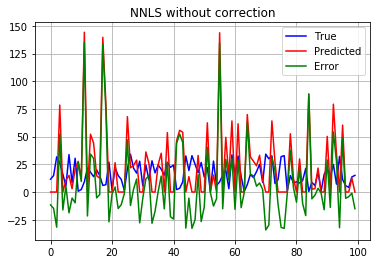

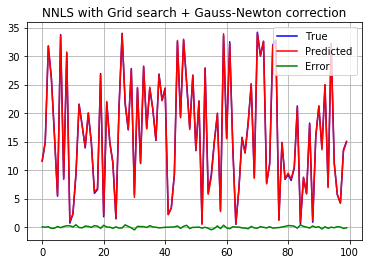

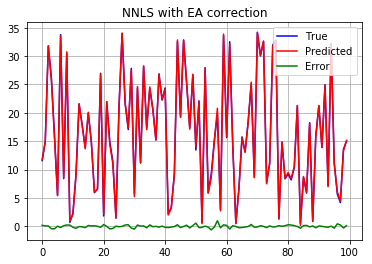

In [7]:
_ = plt.figure()
_ = plt.plot(results[:, 0], 'b-', results[:, 1], 'r-', results[:, 1] - results[:, 0], 'g-')
plt.grid()
_ = plt.title('NNLS without correction')
_ = plt.legend(['True', 'Predicted', 'Error'])
plt.show()

_ = plt.figure()
_ = plt.plot(results[:, 0], 'b-', results[:, 2], 'r-', results[:, 2] - results[:, 0], 'g-')
plt.grid()
_ = plt.title('NNLS with Grid search + Gauss-Newton correction')
_ = plt.legend(['True', 'Predicted', 'Error'])
plt.show()

_ = plt.figure()
_ = plt.plot(results[:, 0], 'b-', results[:, 3], 'r-', results[:, 3] - results[:, 0], 'g-')
plt.grid()
_ = plt.title('NNLS with EA correction')
_ = plt.legend(['True', 'Predicted', 'Error'])
plt.show()

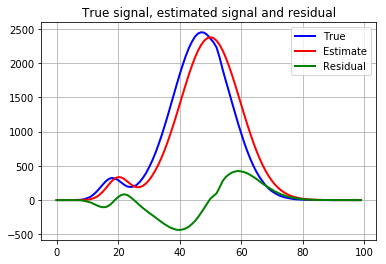

Prediction without correction [ 45.20025294 396.45627916   0.        ]
Prediction with Grid search + Gauss-Newton correction [ 43.40442367 409.20867861  14.87960549]
Prediction with EA correction [ 43.42703991 409.18041953  15.01012261]
True [ 43.24316891 409.17102244  14.89455534]


In [8]:
index = 1
true_concentrations = mixtures_data[index]['contributions']
signal = mixtures_data[index]['signal']

prediction0 = nnls_fit(signal, pure_components)
prediction1 = solve_with_grid_search_gauss_newton(X, signal, pure_components)[0]
prediction2 = solve_with_EA(X, signal, pure_components)[0]

signal_estimate = calculate_signal(prediction0, pure_components)
residual = signal_estimate - signal

_ = plt.plot(signal, 'b', linewidth=2, label='True')
_ = plt.plot(signal_estimate, 'r', linewidth=2, label='Estimate')
_ = plt.plot(residual, 'g', linewidth=2, label='Residual')
plt.grid()
_ = plt.title('True signal, estimated signal and residual')
_ = plt.legend()
plt.show()

print('Prediction without correction', prediction0)
print('Prediction with Grid search + Gauss-Newton correction', prediction1)
print('Prediction with EA correction', prediction2)
print('True', true_concentrations)